In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
aco2 = pd.read_csv("Datasets/annual-co2-emissions-per-country.csv")
aco2.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [6]:
population = pd.read_csv("Datasets/population.csv")
population.head()

,Entity,Year,Population - Sex: all - Age: all - Variant: estimates
0,Afghanistan,1950,7776182
1,Afghanistan,1951,7879343
2,Afghanistan,1952,7987783
3,Afghanistan,1953,8096703
4,Afghanistan,1954,8207953


In [10]:
# Merge the two dataframes based on Country and Year
merged_df = pd.merge(aco2, population, on=['Entity', 'Year'], how='inner')

# Filter for the last 30 years (assuming data is available)
# Replace 2023 with the latest available year in your dataset
latest_year = merged_df['Year'].max()
start_year = latest_year - 29
filtered_df = merged_df[(merged_df['Year'] >= start_year) & (merged_df['Year'] <= latest_year)]

# Display the resulting DataFrame
filtered_df.head()

,Entity,Code,Year,Annual CO₂ emissions,Population - Sex: all - Age: all - Variant: estimates
44,Afghanistan,AFG,1994,1453829.0,16250799
45,Afghanistan,AFG,1995,1417327.0,17065836
46,Afghanistan,AFG,1996,1370104.0,17763265
47,Afghanistan,AFG,1997,1304152.0,18452100
48,Afghanistan,AFG,1998,1278504.0,19159996


In [9]:
# Calculate the new column 'CO2 per capita'
filtered_df['CO2 per capita'] = filtered_df['Annual CO₂ emissions'] / filtered_df['Population - Sex: all - Age: all - Variant: estimates']

# Display the resulting DataFrame
filtered_df.head()

C:\Users\90543\AppData\Local\Temp\ipykernel_8648\380483304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO2 per capita'] = filtered_df['Annual CO₂ emissions'] / filtered_df['Population - Sex: all - Age: all - Variant: estimates']


,Entity,Code,Year,Annual CO₂ emissions,Population - Sex: all - Age: all - Variant: estimates,CO2 per capita
44,Afghanistan,AFG,1994,1453829.0,16250799,0.089462
45,Afghanistan,AFG,1995,1417327.0,17065836,0.083051
46,Afghanistan,AFG,1996,1370104.0,17763265,0.077131
47,Afghanistan,AFG,1997,1304152.0,18452100,0.070678
48,Afghanistan,AFG,1998,1278504.0,19159996,0.066728


In [12]:
er = pd.read_csv("Datasets/electricity-renewables.csv")
er.head()

,Entity,Code,Year,Electricity from renewables - TWh
0,ASEAN (Ember),NaN,2000,73.25
1,ASEAN (Ember),NaN,2001,77.19
2,ASEAN (Ember),NaN,2002,76.52
3,ASEAN (Ember),NaN,2003,76.40
4,ASEAN (Ember),NaN,2004,77.96


In [13]:
eg = pd.read_csv("Datasets/electricity-generation.csv")
eg.head()

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56


In [15]:
# Merge the electricity generation and renewable energy dataframes
merged_electricity = pd.merge(eg, er, on=['Entity', 'Year', 'Code'], how='inner')

# Filter for the last 30 years
latest_year = merged_electricity['Year'].max()
start_year = latest_year - 29
filtered_electricity = merged_electricity[(merged_electricity['Year'] >= start_year) & (merged_electricity['Year'] <= latest_year)]

# Select relevant columns
filtered_electricity = filtered_electricity[['Year', 'Code', 'Entity', 'Electricity generation - TWh', 'Electricity from renewables - TWh']]

# Display the resulting DataFrame
filtered_electricity.head()

,Year,Code,Entity,Electricity generation - TWh,Electricity from renewables - TWh
0,2000,NaN,ASEAN (Ember),378.61,73.25
1,2001,NaN,ASEAN (Ember),404.85,77.19
2,2002,NaN,ASEAN (Ember),433.19,76.52
3,2003,NaN,ASEAN (Ember),458.24,76.40
4,2004,NaN,ASEAN (Ember),496.56,77.96


In [16]:
# Calculate the ratio
filtered_electricity['Ratio'] = filtered_electricity['Electricity from renewables - TWh'] / filtered_electricity['Electricity generation - TWh']

# Display the resulting DataFrame
filtered_electricity.head()

,Year,Code,Entity,Electricity generation - TWh,Electricity from renewables - TWh,Ratio
0,2000,NaN,ASEAN (Ember),378.61,73.25,0.193471
1,2001,NaN,ASEAN (Ember),404.85,77.19,0.190663
2,2002,NaN,ASEAN (Ember),433.19,76.52,0.176643
3,2003,NaN,ASEAN (Ember),458.24,76.40,0.166725
4,2004,NaN,ASEAN (Ember),496.56,77.96,0.157000


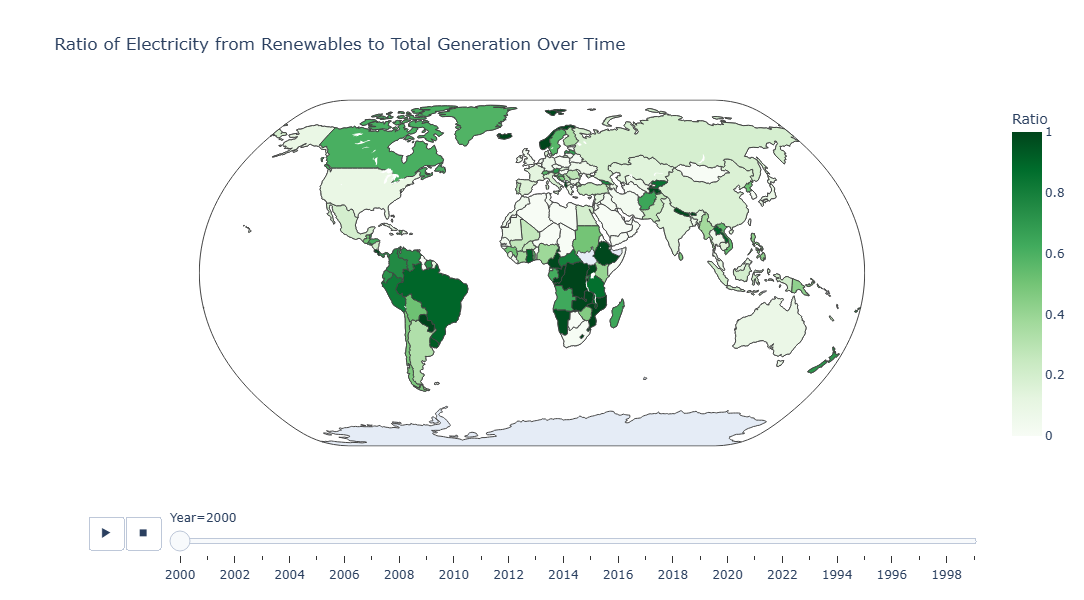

In [23]:
import plotly.express as px
fig = px.choropleth(filtered_electricity,
                    locations="Code",
                    color="Ratio",  # Use the calculated ratio for color
                    hover_name="Entity",
                    animation_frame="Year",  # Animate by year
                    color_continuous_scale="greens",  # Choose a color scale
                    projection="natural earth",
                    title='Ratio of Electricity from Renewables to Total Generation Over Time',
                    width=1000, 
                    height=600)

fig.show()